In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
L_indices = [33, 35]
base_directories = '../report_L_test'

problem_name = 'benchmark'

In [3]:
directories = [os.path.join(base_directories, 'VARN_' + str(L_index) + '_steps_9_' + problem_name + '_L_test_LSCHEME') for L_index in L_indices]

In [4]:
scheme_dictionary = {}
scheme_iterations = {}
scheme_time = {}

In [5]:
for directory, L_index in zip(directories, L_indices):
    print('Reading contents of directory ' + directory)
    files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))

    print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files')

    scheme_dictionary[str(L_index)] = list()

    for file in files:
        scheme_dictionary[str(L_index)].append( file )
    
    scheme_dictionary[str(L_index)].sort( )

    print('')

Reading contents of directory ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME
Pattern ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/*_benchmark*.csv matched with 8 files

Reading contents of directory ../report_L_test/VARN_35_steps_9_benchmark_L_test_LSCHEME
Pattern ../report_L_test/VARN_35_steps_9_benchmark_L_test_LSCHEME/*_benchmark*.csv matched with 8 files



In [6]:
for L_index in L_indices:
    scheme_iterations[str(L_index)] = []

    for file in scheme_dictionary[str(L_index)]:
        with open(file, 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            scheme_iterations[str(L_index)].append(sum(1 for row in lines))

            print('File ' + file + ' has ' + str(scheme_iterations[str(L_index)][-1]) + ' iterations!')
    
    print('')

File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/020_benchmark_L_test_LSCHEME_richards_solver.csv has 47 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/040_benchmark_L_test_LSCHEME_richards_solver.csv has 42 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv has 42 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/080_benchmark_L_test_LSCHEME_richards_solver.csv has 41 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/100_benchmark_L_test_LSCHEME_richards_solver.csv has 37 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/120_benchmark_L_test_LSCHEME_richards_solver.csv has 36 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/140_benchmark_L_test_LSCHEME_richards_solver.csv has 33 iterations!
File ../report_L_test/VARN_33_steps_9_benchmark_L_test_LSCHEME/160_benchmark_L_test

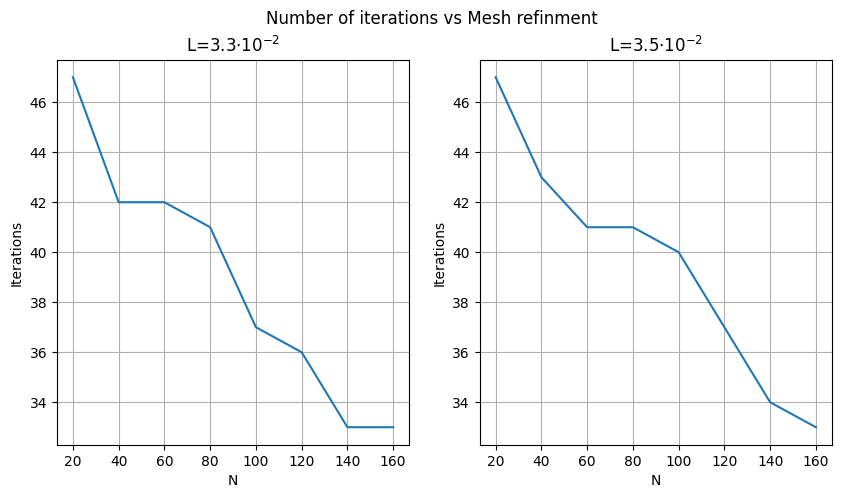

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


fig.suptitle('Number of iterations vs Mesh refinment')

for ax, L_index in zip(axs, L_indices):

    ax.plot([10 * 2*i for i in range(1, 9)], scheme_iterations[str(L_index)])
    ax.set_title('L=' + str(L_index / 10) + '$\cdot 10^{-2}$')

    ax.set_xlabel('N')
    ax.set_ylabel('Iterations')
    ax.grid()